In [1]:
# import the usual
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

% matplotlib inline
pd.set_option('display.max_columns', 500)

In [20]:
#Music Data Loading
df = pd.read_csv("./lastfm-dataset-360k-small/full.csv",encoding = "ISO-8859-1",index_col=0)
users = pd.read_csv("./lastfm-dataset-360k-small/usersha1-profile.csv",encoding = "ISO-8859-1",index_col=0)

In [43]:
users['signupDate'] = pd.to_datetime(users['signupDate'],infer_datetime_format=True)
users.head()

,userId,gender,age,country,signupDate
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,2007-02-01
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,2007-12-04
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,2006-09-01
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,2008-04-28
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,2006-01-27


## Missing Data

In [17]:
for column in list(df.columns):
    print ("{}% of the data from {} column is missing".format(round(df[column].isnull().sum() * 100 / len(df.gender),2), column))

0.0% of the data from userId column is missing
1.29% of the data from artistId column is missing
0.0% of the data from artistName column is missing
0.0% of the data from count column is missing
9.26% of the data from gender column is missing
21.1% of the data from age column is missing
0.0% of the data from country column is missing
0.0% of the data from signupDate column is missing


## Most Active Users

In [4]:
user_count = pd.pivot_table(df,index="userId",values="count",aggfunc="sum").sort_values(ascending=False)

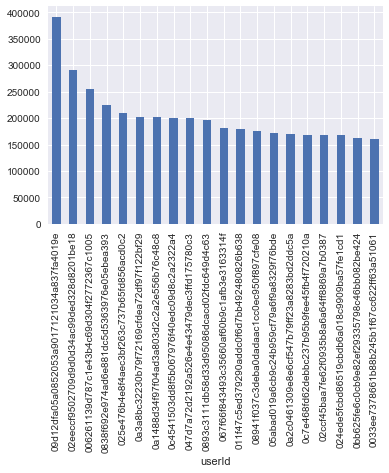

In [5]:
user_count.head(20).plot(kind='bar')

## Most Popular Artists

In [6]:
top_artists = pd.pivot_table(df,index="artistId",values="count",aggfunc="sum").sort_values(ascending=False)

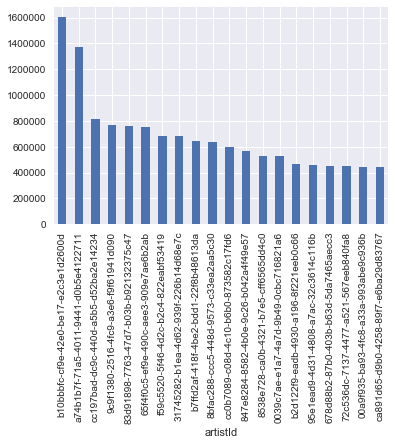

In [7]:
top_artists.head(20).plot(kind="bar")

In [ ]:
artistids = df["artistId"].unique()
counter = 0
for i in artistids:
    
    vcs = df.loc[df["artistId"] == i,"artistName"].value_counts()
    count = len(vcs)
    if count > 1:
        counter += 1
print (counter)

## Gender
### Gender Proportions

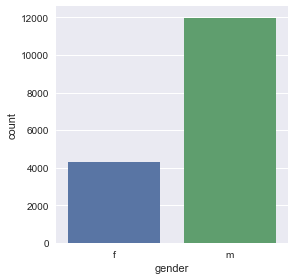

In [36]:
sns.factorplot(data=users,x='gender',kind='count')

## Countries

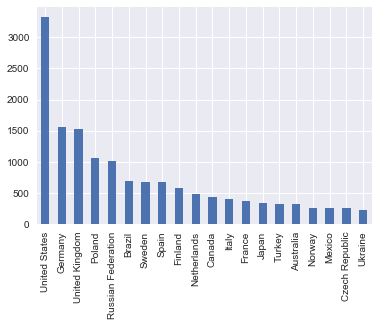

In [38]:
users.country.value_counts().sort_values(inplace=False,ascending=False).head(20).plot(kind='bar')

## Signup Date